<a href="https://colab.research.google.com/github/dkormn/NLP/blob/main/model_comparison_biltsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# ZIP dosyasının konumu
zip_path = '/content/drive/MyDrive/NLP/dataset.zip'

# Hedef klasör: ZIP çıkarılacak yer
extract_path = '/content/drive/MyDrive/NLP/ttc4900_extracted'

# ZIP'i aç
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP çıkarıldı:", extract_path)


ZIP çıkarıldı: /content/drive/MyDrive/NLP/ttc4900_extracted


In [ ]:
import os

for file in os.listdir(extract_path):
    print(file)


7allV03.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP/ttc4900_extracted/7allV03.csv')
print(df.head())
# Veri kümesi büyüklüğü
print("Toplam örnek sayısı:", len(df))

# Sınıf dağılımı
print("\nSınıf dağılımı:")
print(df['category'].value_counts())

   category                                               text
0  siyaset    3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1  siyaset    mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2  siyaset    disko lar kaldırılıyor başbakan_yardımcısı ar...
3  siyaset    sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4  siyaset    erdoğan idamın bir haklılık sebebi var demek ...
Toplam örnek sayısı: 4900

Sınıf dağılımı:
category
siyaset       700
dunya         700
ekonomi       700
kultur        700
saglik        700
spor          700
teknoloji     700
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Eksik verileri sil
df.dropna(inplace=True)

texts = df['text'].astype(str)
labels = df['category']

# Etiketleri sayıya çevir
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y)

# Tokenizer – sayısallaştırma
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding – hepsi eşit uzunlukta olsun
X = pad_sequences(sequences, maxlen=100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model parametreleri
vocab_size = 10000
embedding_dim = 128
max_len = 100
num_classes = y.shape[1]

# Model kur
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(num_classes, activation='softmax'))

# Derleme
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Eğitim
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2193 - loss: 1.9229 - val_accuracy: 0.3112 - val_loss: 1.7264
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5073 - loss: 1.4269 - val_accuracy: 0.6684 - val_loss: 0.9750
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8090 - loss: 0.7133 - val_accuracy: 0.7449 - val_loss: 0.7400
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8730 - loss: 0.4288 - val_accuracy: 0.7219 - val_loss: 0.7631
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9461 - loss: 0.2401 - val_accuracy: 0.7806 - val_loss: 0.6786
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9388 - loss: 0.2339 - val_accuracy: 0.7883 - val_loss: 0.7042
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9835 - loss: 0.0947 - val_accuracy: 0.8061 - val_loss: 0.6273
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9911 - loss: 0.0455 - val_accuracy: 0.7806 - val_loss

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Tahmin et
y_pred_probs = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Rapor
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

      dunya        0.66      0.84      0.74       131
    ekonomi        0.77      0.77      0.77       142
     kultur        0.84      0.85      0.84       139
     saglik        0.86      0.90      0.88       122
    siyaset        0.82      0.65      0.72       158
       spor        0.95      0.91      0.93       147
  teknoloji        0.82      0.79      0.81       141

    accuracy                           0.81       980
   macro avg       0.82      0.82      0.81       980
weighted avg       0.82      0.81      0.81       980



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2040 - loss: 1.9302 - val_accuracy: 0.3546 - val_loss: 1.6198
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4254 - loss: 1.4691 - val_accuracy: 0.4872 - val_loss: 1.2225
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6435 - loss: 0.9355 - val_accuracy: 0.6199 - val_loss: 1.0700
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7254 - loss: 0.7708 - val_accuracy: 0.7270 - val_loss: 0.8204
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8901 - loss: 0.4297 - val_accuracy: 0.8138 - val_loss: 0.6260
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9439 - loss: 0.2447 - val_accuracy: 0.8112 - val_loss: 0.6682
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9612 - loss: 0.1778 - val_accuracy: 0.8163 - val_loss: 0.6534
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

      dunya        0.69      0.85

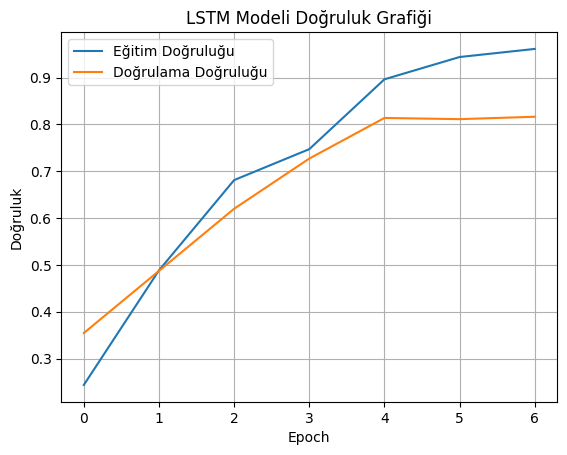

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Model parametreleri
vocab_size = 10000
embedding_dim = 128
max_len = 100
num_classes = y.shape[1]

# Modeli oluştur
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.5))  # Overfitting'e karşı
model_lstm.add(Dense(num_classes, activation='softmax'))

# Derleme
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Eğitimi başlat
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Test sonrası sınıflandırma raporu
y_pred_probs = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Eğitim grafiği (doğruluk)
plt.plot(history_lstm.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_lstm.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.title("LSTM Modeli Doğruluk Grafiği")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Etiketleri tekrar sayısal hale getiriyoruz
y_labels = np.argmax(y, axis=1)

# Sınıf ağırlıklarını hesapla
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_labels),
    y=y_labels
)

# Sözlük formatında ver
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)


{0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0), 5: np.float64(1.0), 6: np.float64(1.0)}


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2199 - loss: 1.9308 - val_accuracy: 0.4235 - val_loss: 1.6991
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4101 - loss: 1.5198 - val_accuracy: 0.4949 - val_loss: 1.2625
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5868 - loss: 1.0875 - val_accuracy: 0.5077 - val_loss: 1.1872
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6865 - loss: 0.8751 - val_accuracy: 0.6786 - val_loss: 1.0077
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8755 - loss: 0.4901 - val_accuracy: 0.7908 - val_loss: 0.7470
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9288 - loss: 0.3116 - val_accuracy: 0.8036 - val_loss: 0.6673
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9678 - loss: 0.1564 - val_accuracy: 0.7857 - val_loss: 0.7388
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8956 - loss: 0.3711 - val_accuracy: 0.8061 - val_loss: 0.6687
31

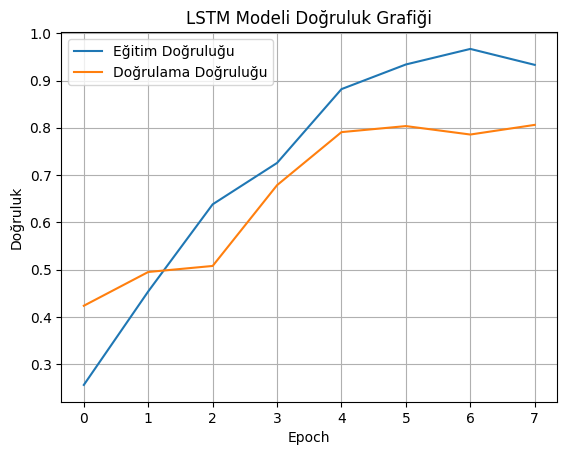

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Model parametreleri
vocab_size = 10000
embedding_dim = 128
max_len = 100
num_classes = y.shape[1]

# Modeli oluştur
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.5))  # Overfitting'e karşı
model_lstm.add(Dense(num_classes, activation='softmax'))

# Derleme
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Eğitimi başlat
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    class_weight=class_weights_dict,  # ← BURAYA EKLENİR
    verbose=1
)

# Test sonrası sınıflandırma raporu
y_pred_probs = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Eğitim grafiği (doğruluk)
plt.plot(history_lstm.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_lstm.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.title("LSTM Modeli Doğruluk Grafiği")
plt.legend()
plt.grid()
plt.show()


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz
!gunzip cc.tr.300.vec.gz

--2025-05-13 21:56:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.25, 13.226.210.15, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1261500728 (1.2G) [binary/octet-stream]
Saving to: ‘cc.tr.300.vec.gz’

cc.tr.300.vec.gz    100%[===================>]   1.17G   174MB/s    in 7.2s    

2025-05-13 21:56:32 (167 MB/s) - ‘cc.tr.300.vec.gz’ saved [1261500728/1261500728]



In [ ]:
import numpy as np

embedding_index = {}
with open("cc.tr.300.vec", encoding='utf-8') as f:
    next(f)  # ilk satırda boyut bilgisi var, atla
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print("Vektör sayısı:", len(embedding_index))


Vektör sayısı: 2000000


In [ ]:
embedding_dim = 300  # fastText Türkçe için
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model_glove = Sequential()
model_glove.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False  # bu vektörleri eğitme, sabit kalsın
))
model_glove.add(LSTM(64))
model_glove.add(Dropout(0.5))
model_glove.add(Dense(num_classes, activation='softmax'))

model_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history_glove = model_glove.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)

# Test sonrası
y_pred_probs = model_glove.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2335 - loss: 1.8986 - val_accuracy: 0.3954 - val_loss: 1.6489
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4718 - loss: 1.5262 - val_accuracy: 0.5459 - val_loss: 1.3141
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5443 - loss: 1.2328 - val_accuracy: 0.6709 - val_loss: 1.0360
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5266 - loss: 1.2597 - val_accuracy: 0.4388 - val_loss: 1.4890
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5213 - loss: 1.3061 - val_accuracy: 0.6760 - val_loss: 1.0320
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6532 - loss: 0.9610 - val_accuracy: 0.6837 - val_loss: 0.9367
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6630 - loss: 0.9804 - val_accuracy: 0.6913 - val_loss: 0.8856
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7063 - loss: 0.8617 - val_accuracy: 0.7653 - val_loss

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# GRU Modeli
model_gru = Sequential()
model_gru.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False  # FastText vektörlerini eğitme
))
model_gru.add(GRU(64))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(num_classes, activation='softmax'))

# Derleme
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Eğit
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2153 - loss: 1.9174 - val_accuracy: 0.2730 - val_loss: 1.8285
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3471 - loss: 1.7609 - val_accuracy: 0.3597 - val_loss: 1.6071
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4514 - loss: 1.4651 - val_accuracy: 0.5051 - val_loss: 1.2177
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5485 - loss: 1.1896 - val_accuracy: 0.6429 - val_loss: 1.0336
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6193 - loss: 1.0249 - val_accuracy: 0.6582 - val_loss: 0.9499
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6661 - loss: 0.9470 - val_accuracy: 0.6811 - val_loss: 0.8961
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6822 - loss: 0.8949 - val_accuracy: 0.7066 - val_loss: 0.8456
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7139 - loss: 0.8193 - val_accuracy: 0.7245 - val_loss: 0.8399
Ep

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Tahmin
y_pred_probs = model_gru.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Rapor
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

      dunya        0.62      0.66      0.64       131
    ekonomi        0.77      0.55      0.64       142
     kultur        0.67      0.90      0.77       139
     saglik        0.78      0.94      0.85       122
    siyaset        0.67      0.54      0.60       158
       spor        0.90      0.94      0.92       147
  teknoloji        0.82      0.72      0.77       141

    accuracy                           0.74       980
   macro avg       0.75      0.75      0.74       980
weighted avg       0.75      0.74      0.74       980



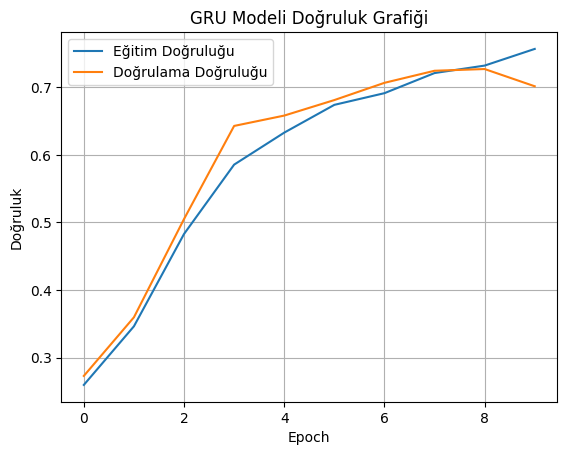

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_gru.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_gru.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title("GRU Modeli Doğruluk Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model oluşturuluyor
model_bilstm = Sequential()

# fastText Türkçe embedding + Bi-LSTM
model_bilstm.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False  # İsteğe bağlı True yapılır
))

# Bi-directional LSTM
model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(num_classes, activation='softmax'))

# Model derleme
model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Eğitim
history_bilstm = model_bilstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2386 - loss: 1.8886 - val_accuracy: 0.5306 - val_loss: 1.4224
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4849 - loss: 1.4074 - val_accuracy: 0.6378 - val_loss: 1.0559
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6342 - loss: 1.0487 - val_accuracy: 0.7092 - val_loss: 0.9923
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6951 - loss: 0.9650 - val_accuracy: 0.7372 - val_loss: 0.8452
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7555 - loss: 0.8188 - val_accuracy: 0.7628 - val_loss: 0.7933
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7518 - loss: 0.7943 - val_accuracy: 0.7730 - val_loss: 0.7137
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8091 - loss: 0.6482 - val_accuracy: 0.7270 - val_loss: 0.8418
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8082 - loss: 0.6708 - val_accuracy: 0.7704 - val_loss: 0.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Tahmin
y_pred_probs = model_bilstm.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Rapor
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

      dunya        0.77      0.66      0.71       131
    ekonomi        0.63      0.89      0.73       142
     kultur        0.74      0.91      0.82       139
     saglik        0.93      0.86      0.89       122
    siyaset        0.77      0.73      0.75       158
       spor        0.98      0.82      0.89       147
  teknoloji        0.92      0.73      0.81       141

    accuracy                           0.80       980
   macro avg       0.82      0.80      0.80       980
weighted avg       0.82      0.80      0.80       980



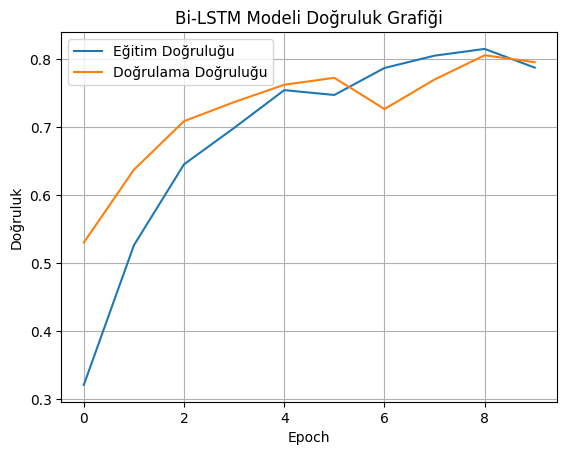

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_bilstm.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_bilstm.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title("Bi-LSTM Modeli Doğruluk Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model oluşturuluyor
model_bilstm = Sequential()

# fastText Türkçe embedding + Bi-LSTM
model_bilstm.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True  # İsteğe bağlı True yapabilirsin
))

# Bi-directional LSTM
model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(num_classes, activation='softmax'))

# Model derleme
model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Eğitim
history_bilstm = model_bilstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2707 - loss: 1.8569 - val_accuracy: 0.4796 - val_loss: 1.4792
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6329 - loss: 1.1541 - val_accuracy: 0.7653 - val_loss: 0.8898
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8443 - loss: 0.5529 - val_accuracy: 0.7449 - val_loss: 0.8487
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8870 - loss: 0.4005 - val_accuracy: 0.7959 - val_loss: 0.6311
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9505 - loss: 0.1786 - val_accuracy: 0.8265 - val_loss: 0.6604
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9799 - loss: 0.0945 - val_accuracy: 0.8214 - val_loss: 0.6813


In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return K.sum(loss, axis=1)
    return focal_loss_fixed


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

model_bilstm_focal = Sequential()

model_bilstm_focal.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True
))

model_bilstm_focal.add(Bidirectional(LSTM(64)))
model_bilstm_focal.add(Dropout(0.5))
model_bilstm_focal.add(Dense(num_classes, activation='softmax'))

model_bilstm_focal.compile(
    loss=focal_loss(gamma=2.0, alpha=0.25),  # Burada focal loss'u çağırıyoruz
    optimizer='adam',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history_bilstm_focal = model_bilstm_focal.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.2720 - loss: 0.3336 - val_accuracy: 0.6148 - val_loss: 0.1797
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7117 - loss: 0.1233 - val_accuracy: 0.7832 - val_loss: 0.0983
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8933 - loss: 0.0495 - val_accuracy: 0.7857 - val_loss: 0.0952
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9280 - loss: 0.0287 - val_accuracy: 0.8495 - val_loss: 0.0748
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9701 - loss: 0.0130 - val_accuracy: 0.8163 - val_loss: 0.0951
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9783 - loss: 0.0097 - val_accuracy: 0.8342 - val_loss: 0.0966


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Tahmin yap
y_pred_probs = model_bilstm_focal.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Raporla
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

      dunya        0.72      0.89      0.79       131
    ekonomi        0.75      0.82      0.78       142
     kultur        0.78      0.88      0.83       139
     saglik        0.90      0.87      0.88       122
    siyaset        0.86      0.72      0.79       158
       spor        0.97      0.91      0.94       147
  teknoloji        0.90      0.77      0.83       141

    accuracy                           0.83       980
   macro avg       0.84      0.84      0.83       980
weighted avg       0.84      0.83      0.83       980



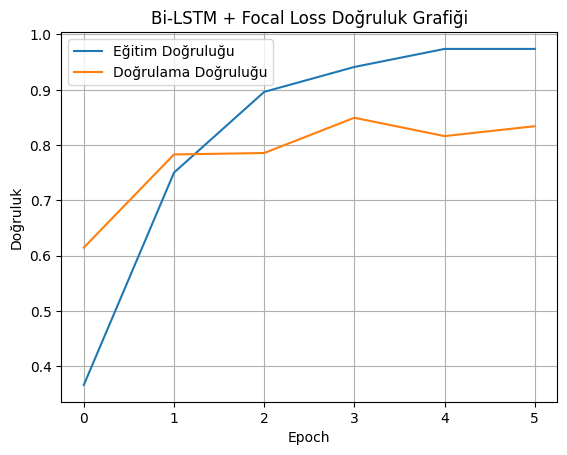

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_bilstm_focal.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_bilstm_focal.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title("Bi-LSTM + Focal Loss Doğruluk Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid()
plt.show()


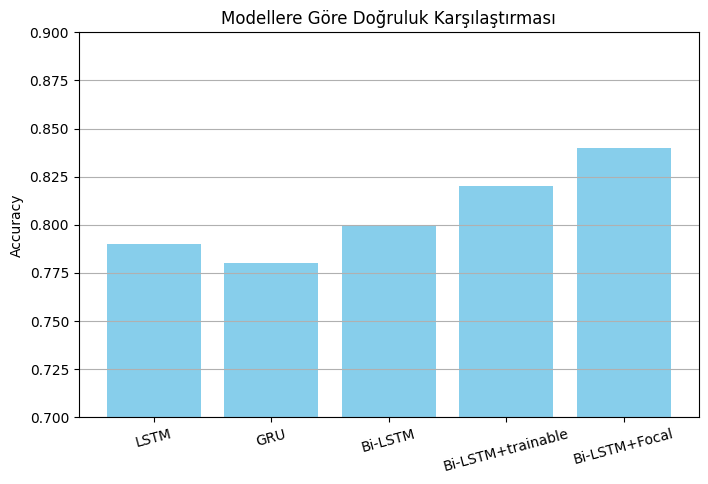

In [ ]:
import matplotlib.pyplot as plt

model_names = ['LSTM', 'GRU', 'Bi-LSTM', 'Bi-LSTM+trainable', 'Bi-LSTM+Focal']
accuracies = [0.79, 0.78, 0.80, 0.82, 0.84]

plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color='skyblue')
plt.title("Modellere Göre Doğruluk Karşılaştırması")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.9)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()


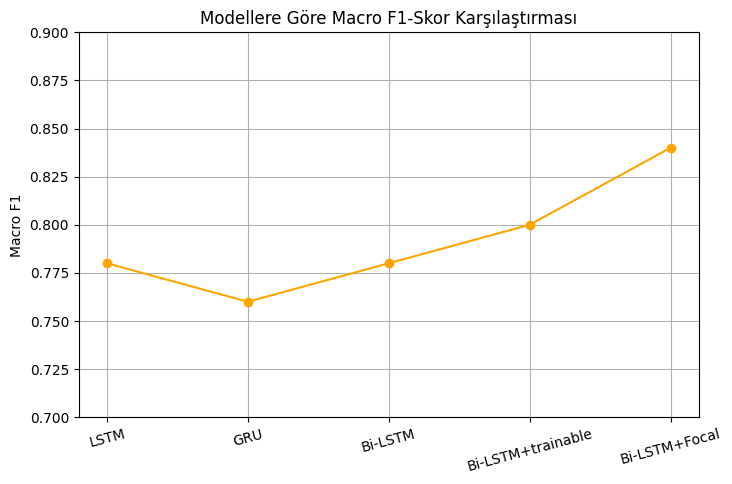

In [ ]:
f1_scores = [0.78, 0.76, 0.78, 0.80, 0.84]

plt.figure(figsize=(8,5))
plt.plot(model_names, f1_scores, marker='o', linestyle='-', color='orange')
plt.title("Modellere Göre Macro F1-Skor Karşılaştırması")
plt.ylabel("Macro F1")
plt.ylim(0.7, 0.9)
plt.grid(True)
plt.xticks(rotation=15)
plt.show()


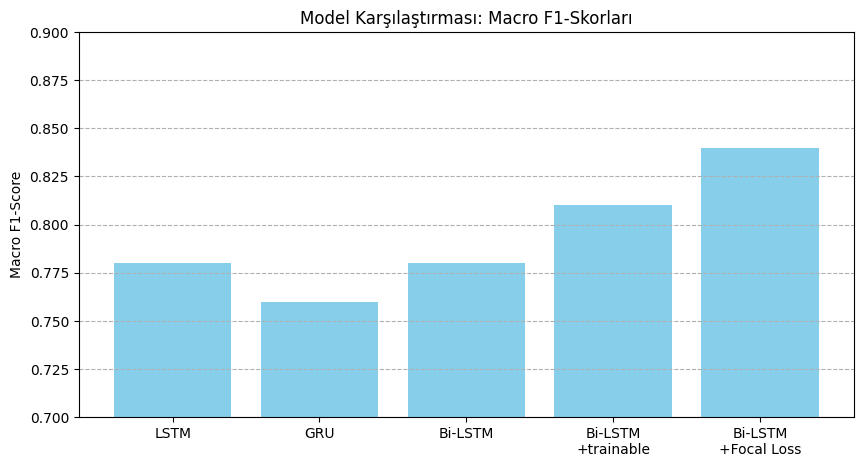

In [ ]:
import matplotlib.pyplot as plt

models = ['LSTM', 'GRU', 'Bi-LSTM', 'Bi-LSTM\n+trainable', 'Bi-LSTM\n+Focal Loss']
macro_f1 = [0.78, 0.76, 0.78, 0.81, 0.84]

plt.figure(figsize=(10, 5))
plt.bar(models, macro_f1, color='skyblue')
plt.ylim(0.70, 0.90)
plt.ylabel('Macro F1-Score')
plt.title('Model Karşılaştırması: Macro F1-Skorları')
plt.grid(axis='y', linestyle='--')
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP/ttc4900_extracted/7allV03.csv')
print(df.head())
# Veri kümesi büyüklüğü
print("Toplam örnek sayısı:", len(df))

# Sınıf dağılımı
print("\nSınıf dağılımı:")
print(df['category'].value_counts())

   category                                               text
0  siyaset    3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1  siyaset    mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2  siyaset    disko lar kaldırılıyor başbakan_yardımcısı ar...
3  siyaset    sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4  siyaset    erdoğan idamın bir haklılık sebebi var demek ...
Toplam örnek sayısı: 4900

Sınıf dağılımı:
category
siyaset       700
dunya         700
ekonomi       700
kultur        700
saglik        700
spor          700
teknoloji     700
Name: count, dtype: int64


In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') #ve bir bu gibi kelimeler indirdildi

stop_words = set(stopwords.words("turkish"))

def temizle(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Sayıları çıkar
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["text"] = df["text"].astype(str).apply(temizle)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["text"]).toarray()

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df["category"])
